In [1]:
from polyase import *
import pandas as pd
import polars as pl 
import RNApysoforms as RNApy

/users/nadjafn/.conda/envs/polyase/lib/python3.12/site-packages/sorted_nearest/__init__.py:1: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


# Running Polyase on tetraploid potato sample 

## Required Files

Files necessary for this tutorial are deposited on Zenodo ([DOI link here]()):

- **Syntelog finder output**: To assign genes based on syntelogous relationships
- **Oarfish directory**: Contains transcript quantification data
- **GFF file (liftoff annotation)**: Genome annotation from liftoff
- **GFF file (novel transcripts)**: Novel identified transcripts
- **Functional gene annotation**: Gene functional annotations

## Installation of polyase 


You can install polyase using pip:
```bash
pip install polyase
```


## 1) Reading in the data 

In this section we will read in the data genespace output file, transcript quanitfication directory, tx2gene. 

In [2]:
out_dir_syntelogfinder = "/scratch/nadjafn/potato-allelic-orthogroups/output_atlantic_liftoff"
out_dir_long_read_quant = "/scratch/nadjafn/nf-core-plantlongrnaseq/output_atlantic_liftoff"

In [3]:
# File with syntelog categories from SyntelogFinder
var_obs_file = f"{out_dir_syntelogfinder}/genespace/unitato2Atl.no_scaffold.no_hap0_genespace_categories.tsv"
# Directory of gene counts from oarfish generated by long-read quantification pipeline
gene_counts_dir = f"{out_dir_long_read_quant}/oarfish/"
tx2gene = f"{out_dir_long_read_quant}/custom/combined.tx2gene.tsv"

## Dataset Information

**Source**: [Citation/DOI from the paper]

**Organism**: *Solanum tuberosum* cv. Atlantic (tetraploid)

**Experimental Design**:
- **10 samples** total from cultivar Atlantic
- **2 tissues**: Leaf and tuber
- **Biological replicates**: 5 samples per tissue type
- **Sequencing**: Long-read RNA-seq (ONT)
- **Quantification**: Oarfish transcript-level counts

**Sample Information**:

| Sample ID    | Tissue | Description |
|--------------|--------|-------------|
| SRR14993892  | Leaf   | Replicate 1 |
| SRR14993893  | Leaf   | Replicate 2 |
| SRR14993894  | Leaf   | Replicate 3 |
| SRR14993895  | Leaf   | Replicate 4 |
| SRR14996168  | Leaf   | Replicate 5 |
| SRR14995031  | Tuber  | Replicate 1 |
| SRR14995032  | Tuber  | Replicate 2 |
| SRR14995033  | Tuber  | Replicate 3 |
| SRR14995034  | Tuber  | Replicate 4 |
| SRR14995933  | Tuber  | Replicate 5 |

In [4]:
# Define sample IDs and their conditions
sample_info = {
    "SRR14993892": "leaf",
    "SRR14993893": "leaf",
    "SRR14993894": "leaf",
    "SRR14993895": "leaf",
    "SRR14996168": "leaf",
    "SRR14995031": "tuber",
    "SRR14995032": "tuber",
    "SRR14995033": "tuber",
    "SRR14995034": "tuber",
    "SRR14995933": "tuber"
} 

# With isoforms
allelic_data = load_ase_data(
    var_obs_file=var_obs_file,
    sample_info=sample_info,
    tx_to_gene_file=tx2gene,
    isoform_counts_dir=gene_counts_dir,
    quant_dir=gene_counts_dir
)

Loading metadata files...
Loading counts for 10 samples in parallel...
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Oarfish quant.sf format detected
Successfully loaded 10 out of 10 samples
Concatenating count matrices...
Creating isoform metadata...
Adding var_obs annotations for 250224 transcripts...
Found 167997 genes with var_obs annotations
Found 33730 genes without var_obs annotations (will be filled with NaN)
Assigning Synt_id values...
Assigned Synt_id values for 33730 genes (41291 transcripts)
Keeping all 250224 transcripts from expression data
Statistics:
  - Total transcripts: 250224
  - Transcripts with gene_id annotation: 250224
  - Transcripts with var_obs data: 208933
  - Transcripts with NaN var_obs data: 41291
  - Transcr

In [6]:
allelic_data.var.head()

,transcript_id,gene_id,feature_type,Synt_id,synteny_category,syntenic_genes,haplotype,CDS_length_category,CDS_haplotype_with_longest_annotation
Soltu.DM.01G035860.1.Hap4,Soltu.DM.01G035860.1.Hap4,Soltu.DM.01G035860.Hap4,transcript,Synt_id_13852,1hap1_1hap2_0hap3_1hap4_s,"Soltu.DM.01G035860.1.Hap1,Soltu.DM.01G035860.1...",hap4,NaN,NaN
PGSC0003DMT400027435.Hap2,PGSC0003DMT400027435.Hap2,PGSC0003DMG402010580.Hap2,transcript,Synt_id_16070,2hap1_2hap2_2hap3_2hap4_no_s,"Soltu.DM.02G001660.1.Hap1,PGSC0003DMT400027435...",hap2,NaN,NaN
Sotub01g017240.1.1.Hap1,Sotub01g017240.1.1.Hap1,Sotub01g017240.Hap1,transcript,Synt_id_882,1hap1_2hap2_1hap3_1hap4_no_s,"Sotub01g017240.1.1.Hap1,Soltu.DM.01G020240.1.H...",hap1,NaN,NaN
PGSC0003DMT400019990.Hap2,PGSC0003DMT400019990.Hap2,PGSC0003DMG401007736.Hap2,transcript,Synt_id_57683,1hap1_1hap2_1hap3_0hap4_no_s,"PGSC0003DMT400019990.Hap1,PGSC0003DMT400019990...",hap2,NaN,NaN
BambuTx2859,Soltu.DM.08G002690.5.Hap1,Soltu.DM.08G002690.Hap1,transcript,Synt_id_47331,2hap1_1hap2_1hap3_1hap4_no_s,"Soltu.DM.08G018650.1.Hap1,Soltu.DM.08G002690.5...",hap1,NaN,NaN


In [7]:
allelic_data.obs.head()

,condition,em_lib_size,unique_lib_size,ambig_lib_size,total_lib_size
SRR14993894,leaf,6524167.0,3596141,8846994,12443135
SRR14993892,leaf,1314624.0,791265,1518961,2310226
SRR14993893,leaf,711674.0,409917,905189,1315106
SRR14993895,leaf,3207895.0,1914658,3787858,5702516
SRR14996168,leaf,4510475.0,2699095,5260268,7959363


### Add annotation

For interpretation of results we add functional gene annotations from an additional file to the adata.var

In [5]:
# Load functional annotation data
annotation_file = "/scratch/nadjafn/reference/ADAPT_liftoff/Phureja_v4-v6.1_translations.xlsx"
df_annotation = pd.read_excel(annotation_file)
df_annotation = df_annotation.iloc[:, 1:3]
df_annotation.columns = ['gene_id_unitato', 'functional_annotation']

# Remove version suffix from gene IDs (e.g., "GENE.1" -> "GENE")
allelic_data.var['gene_id_unitato'] = allelic_data.var['gene_id'].str.rsplit('.', n=1).str[0]
allelic_data.var['original_index'] = allelic_data.var.index

# Merge annotations
merged_data = pd.merge(
    allelic_data.var,
    df_annotation,
    on='gene_id_unitato',
    how='left'
)

# Remove duplicates and restore index
merged_data = merged_data.drop_duplicates(subset=['original_index', 'gene_id'], keep='first')
merged_data.index = merged_data['original_index']
merged_data = merged_data.drop(columns=['original_index'])

# Update AnnData object
allelic_data.var = merged_data


Let's verify whether Bambu detected any previously unannotated transcripts in our dataset.

In [6]:
allelic_data.var[allelic_data.var_names.str.startswith("Bambu")].head()

,transcript_id,gene_id,feature_type,Synt_id,synteny_category,syntenic_genes,haplotype,CDS_length_category,CDS_haplotype_with_longest_annotation,gene_id_unitato,functional_annotation
original_index,,,,,,,,,,,
BambuTx5212_1,PGSC0003DMT400041635.Hap2,PGSC0003DMG402016141.Hap2,transcript,Synt_id_56292,1hap1_1hap2_1hap3_1hap4_s,"PGSC0003DMT400041635.Hap1,PGSC0003DMT400041635...",hap2,more_1%_difference,1G,PGSC0003DMG402016141,NaN
BambuTx3411_2,None,XLOC_181666,transcript,3,None,None,None,None,None,XLOC_181666,NaN
BambuTx3734_1,None,PGSC0003DMG400011125.Hap0,transcript,4,None,None,None,None,None,PGSC0003DMG400011125,NaN
BambuTx6169_1,None,BambuGene8267,transcript,5,None,None,None,None,None,BambuGene8267,NaN
BambuTx1758_3,Soltu.DM.05G006210.1.Hap3,Soltu.DM.05G006210.Hap3,transcript,Synt_id_6010,4hap1_2hap2_3hap3_1hap4_no_s,"Soltu.DM.05G006210.1.Hap1,Soltu.DM.09G014800.1...",hap3,NaN,NaN,Soltu.DM.05G006210,NB-ARC domain-containing disease resistance pr...


In [10]:
# print specific gene info
allelic_data.var[allelic_data.var['gene_id'].str.contains("Soltu.DM.11G023050")]

,transcript_id,gene_id,feature_type,Synt_id,synteny_category,syntenic_genes,haplotype,CDS_length_category,CDS_haplotype_with_longest_annotation,gene_id_unitato,functional_annotation
original_index,,,,,,,,,,,
BambuTx3983_1,Soltu.DM.11G023050.1.Hap3,Soltu.DM.11G023050.Hap3,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap3,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein
Soltu.DM.11G023050.1.Hap2,Soltu.DM.11G023050.1.Hap2,Soltu.DM.11G023050.Hap2,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap2,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein
BambuTx3983,Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.Hap1,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap1,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein
BambuTx4008_2,Soltu.DM.11G023050.1.Hap3,Soltu.DM.11G023050.Hap3,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap3,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein
BambuTx3983_4,Soltu.DM.11G023050.1.Hap4,Soltu.DM.11G023050.Hap4,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap4,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein
Soltu.DM.11G023050.1.Hap4,Soltu.DM.11G023050.1.Hap4,Soltu.DM.11G023050.Hap4,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap4,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein
Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.Hap1,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap1,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein
BambuTx3983_2,Soltu.DM.11G023050.1.Hap2,Soltu.DM.11G023050.Hap2,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap2,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein
BambuTx4008_3,Soltu.DM.11G023050.1.Hap4,Soltu.DM.11G023050.Hap4,transcript,Synt_id_59067,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.11G023050.1.Hap1,Soltu.DM.11G023050.1...",hap4,less_1%_difference,equal_lengths,Soltu.DM.11G023050,conserved hypothetical protein


Now we will aggregate transcript-level counts to gene-level counts for allele-specific expression analysis. Unique counts are just summed. For ambgious counts we take the mean, under the asseumption that multimapping between transcripts of the same gene to other genes is similar.

In [7]:
# Usage
adata_gene = aggregate_transcripts_to_genes(allelic_data)

# Check the result
print(adata_gene)


Aggregating 250224 transcripts to 201727 genes
Created gene-level AnnData: 10 × 201727
Average transcripts per gene: 1.24
AnnData object with n_obs × n_vars = 10 × 201727
    obs: 'condition', 'em_lib_size', 'unique_lib_size', 'ambig_lib_size', 'total_lib_size'
    var: 'gene_id', 'feature_type', 'transcript_id', 'Synt_id', 'synteny_category', 'syntenic_genes', 'haplotype', 'CDS_length_category', 'CDS_haplotype_with_longest_annotation', 'functional_annotation', 'n_transcripts'
    layers: 'unique_counts', 'ambiguous_counts', 'em_counts', 'em_cpm', 'unique_cpm', 'ambiguous_cpm'


## 2) Gene-level analysis

### Filter low expressed genes

In [8]:
#CPM threshold (automatically normalized)
adata_gene_filtered = filter_low_expressed_genes(
    adata_gene,
    min_expression=20.0,  # 20 count per million
    lib_size_normalization='cpm',
    mode= 'all',
    #library_size_dependent=True,
    verbose=True)

Using uniform threshold: 20.0
Filtered out 87575 groups
Kept 6996 / 201727 items


### Calculate allelic ratios and multimapping ratios

In [9]:
allelic_data_filtered = calculate_allelic_ratios(adata_gene_filtered , 'unique_counts')
allelic_data_filtered = calculate_allelic_ratios(adata_gene_filtered , 'em_counts')
allelic_data_filtered = calculate_multi_ratios(adata_gene_filtered, 'unique_counts', 'ambiguous_counts')

In [14]:
allelic_data_filtered

AnnData object with n_obs × n_vars = 10 × 3665
    obs: 'condition', 'em_lib_size', 'unique_lib_size', 'ambig_lib_size', 'total_lib_size', 'lib_size'
    var: 'gene_id', 'feature_type', 'transcript_id', 'Synt_id', 'synteny_category', 'syntenic_genes', 'haplotype', 'CDS_length_category', 'CDS_haplotype_with_longest_annotation', 'functional_annotation', 'n_transcripts', 'multimapping_ratio'
    layers: 'unique_counts', 'ambiguous_counts', 'em_counts', 'em_cpm', 'unique_cpm', 'ambiguous_cpm', 'allelic_ratio_unique_counts', 'allelic_ratio_em_counts'

### Plotting of allelic ratios for quality control

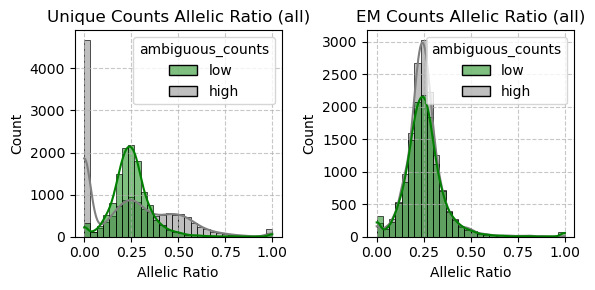

In [10]:
fig = plot_allelic_ratios(
    allelic_data_filtered,
    synteny_category="1hap1_1hap2_1hap3_1hap4_s", 
    sample='all', 
    ratio_type="both",
    figsize = (6,3),
    kde = True,
    multimapping_threshold=0.25,
    #save_path="allelic_ratios.svg"
)


Most genes exhibit balanced allelic expression, with ratios clustering around 0.25. Some genes display extreme ratios, which may represent biologically meaningful patterns or annotation artifacts. Applying a multimapping filter reduces noise from genes with high ambiguous read counts. We will exclude genes showing length differences, as these can introduce bias into the results.

In [11]:
high_bias = allelic_data_filtered [:,(allelic_data_filtered.var['multimapping_ratio'] < 0.25) & (allelic_data_filtered  .layers['allelic_ratio_unique_counts'] > 0.8).all(axis=0) & (allelic_data_filtered .var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s") ]

high_bias.var

,gene_id,feature_type,transcript_id,Synt_id,synteny_category,syntenic_genes,haplotype,CDS_length_category,CDS_haplotype_with_longest_annotation,functional_annotation,n_transcripts,multimapping_ratio
Soltu.DM.06G028650.Hap4,Soltu.DM.06G028650.Hap4,gene,Soltu.DM.06G028650.1.Hap4,Synt_id_39549,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.06G028650.1.Hap1,Soltu.DM.06G028650.1...",hap4,more_20%_difference,4G,Ribosomal L27e protein family,1,0.025207
Soltu.DM.04G000950.Hap4,Soltu.DM.04G000950.Hap4,gene,Soltu.DM.04G000950.1.Hap4,Synt_id_26660,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.04G000950.1.Hap1,Soltu.DM.04G000950.1...",hap4,more_20%_difference,4G,Ribosomal protein S4,1,0.210949
Sotub01g012860.Hap2,Sotub01g012860.Hap2,gene,Sotub01g012860.1.1.Hap2,Synt_id_11456,1hap1_1hap2_1hap3_1hap4_s,"Sotub01g012860.1.1.Hap1,Sotub01g012860.1.1.Hap...",hap2,more_20%_difference,2G,None,1,0.000514
Soltu.DM.06G032940.Hap4,Soltu.DM.06G032940.Hap4,gene,Soltu.DM.06G032940.1.Hap4,Synt_id_40092,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.06G032940.1.Hap1,Soltu.DM.06G032940.1...",hap4,more_20%_difference,4G,Ribosomal protein L16p/L10e family protein,1,0.248933
Soltu.DM.05G025890.Hap3,Soltu.DM.05G025890.Hap3,gene,Soltu.DM.05G025890.1.Hap3,Synt_id_35710,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.05G025890.1.Hap1,Soltu.DM.05G025890.1...",hap3,more_20%_difference,4G,homolog of anti-oxidant,2,0.004286
Soltu.DM.02G000560.Hap4,Soltu.DM.02G000560.Hap4,gene,Soltu.DM.02G000560.1.Hap4,Synt_id_15748,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.02G000560.1.Hap1,Soltu.DM.02G000560.1...",hap4,more_5%_difference,4G,None,2,0.004389
Soltu.DM.06G031650.Hap4,Soltu.DM.06G031650.Hap4,gene,Soltu.DM.06G031650.1.Hap4,Synt_id_39946,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.06G031650.1.Hap1,Soltu.DM.06G031650.1...",hap4,more_20%_difference,4G,pumilio,1,0.157007
Soltu.DM.08G021320.Hap4,Soltu.DM.08G021320.Hap4,gene,Soltu.DM.08G021320.1.Hap4,Synt_id_47662,1hap1_1hap2_1hap3_1hap4_s,"Soltu.DM.08G021320.1.Hap1,Soltu.DM.08G021320.1...",hap4,more_20%_difference,4G,conserved hypothetical protein,1,0.062745


You can see that alleles with high expression ratios (>0.8) have big length differences. 

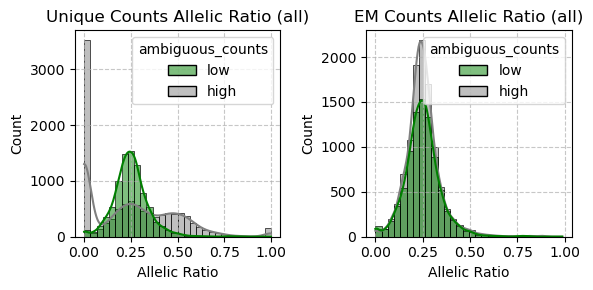

In [12]:
# filter transcripts that are not equal lengths
mask = allelic_data_filtered.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths"
allelic_data_length_filtered = allelic_data_filtered[:,mask].copy()
fig = plot_allelic_ratios(
    allelic_data_length_filtered,
    synteny_category="1hap1_1hap2_1hap3_1hap4_s", 
    sample='all', 
    ratio_type="both",
    figsize = (6,3),
    kde = True,
    multimapping_threshold=0.25,
    #save_path="allelic_ratios.svg"
)


After filtering for alleles of equal length, several of the highly biased genes are removed.

Another potential source of bias arises from unequal transcript numbers per gene. For example, a novel transcript may have been identified on only one haplotype. Therefore, we will filter to include only genes where all alleles have the same number of transcripts.

Genes with different transcript numbers across alleles: 302
Genes with equal transcript numbers across alleles: 1931


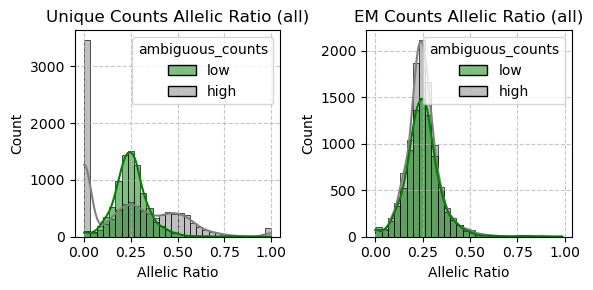

In [13]:
# Group by syntelog ID and check for equal transcript numbers across alleles
synt_ids_same_tx_number = allelic_data_filtered.var.groupby('Synt_id').aggregate({
    'n_transcripts': set
})

# Count genes with different transcript numbers before filtering
genes_diff_tx_number = synt_ids_same_tx_number[synt_ids_same_tx_number['n_transcripts'].apply(lambda x: len(x) > 1)]
print(f"Genes with different transcript numbers across alleles: {len(genes_diff_tx_number)}")

# Keep only syntelogs where all alleles have the same number of transcripts
synt_ids_same_tx_number = synt_ids_same_tx_number[synt_ids_same_tx_number['n_transcripts'].apply(lambda x: len(x) == 1)]
print(f"Genes with equal transcript numbers across alleles: {len(synt_ids_same_tx_number)}")

# Filter for equal-length transcripts with equal transcript numbers
mask = (allelic_data_filtered.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths") & \
       (allelic_data_filtered.var['Synt_id'].isin(synt_ids_same_tx_number.index))



allelic_data_length_filtered = allelic_data_filtered[:, mask].copy()

# Plot allelic ratios after filtering
fig = plot_allelic_ratios(
    allelic_data_length_filtered,
    synteny_category="1hap1_1hap2_1hap3_1hap4_s",
    sample='all',
    ratio_type="both",
    figsize=(6, 3),
    kde=True,
    multimapping_threshold=0.25,
    #save_path="allelic_ratios.svg"
)

Looks much better to what we had before filtering 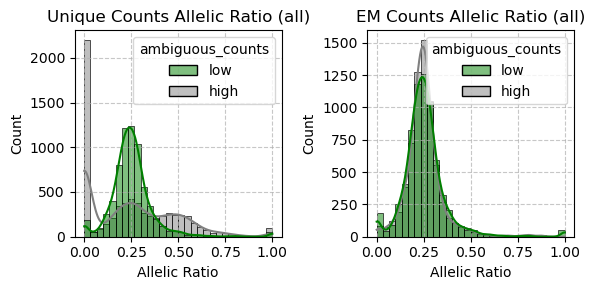

#### Get ASE results for cis for control

In [16]:
# select only the genes with equal lengths, low multimapping ratio and synteny category "1hap1_1hap2_1hap3_1hap4_s"
mask = (allelic_data_filtered.var["multimapping_ratio"] < 0.25) & (allelic_data_filtered.var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s") & (allelic_data_filtered.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths") & (allelic_data_filtered.var['Synt_id'].isin(synt_ids_same_tx_number.index))
allelic_data_length_filter = allelic_data_filtered[:,mask].copy()

# 1. Test for differential allelic ratios withing conditions
cis_results_control = test_allelic_ratios_within_conditions(allelic_data_length_filter, layer="unique_counts", test_condition= "leaf", inplace=True)



# 2. Get top differential syntelogs
cis_top_results = get_top_differential_syntelogs(cis_results_control, n=45, sort_by='ratio_difference', fdr_threshold=0.05, ratio_threshold=0.1)



Using CPM data from layer: unique_cpm
Processing syntelog 100/211
Processing syntelog 200/211
Found 50 from 211 syntelogs with at least one significantly different allele (FDR < 0.005 and ratio difference > 0.1)


In [ ]:
cis_results_control
cis_results_control['significant'] = (cis_results_control['p_value'] < 0.05) & (cis_results_control['ratio_difference'] > 0.1)

import matplotlib.pyplot as plt
import seaborn as sns
sns.swarmplot(y = cis_results_control['ratios_leaf_mean'], x = cis_results_control['allele'],  hue=cis_results_control['significant'], size=1.5 )
plt.yticks([0.0, 0.15, 0.25, 0.35, 0.5, 1.0])

# add a line at y = 0.35 and y = 0.15
plt.axhline(y=0.35, color='r', linestyle='--')
plt.axhline(y=0.15, color='r', linestyle='--')

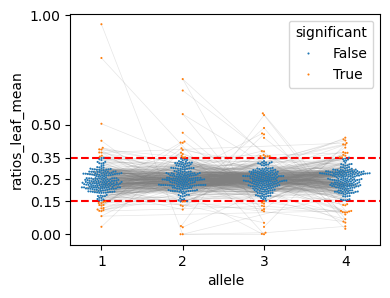

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Your existing code
cis_results_control['significant'] = (cis_results_control['p_value'] < 0.05) & (cis_results_control['ratio_difference'] > 0.1)

# Add a temporary column to track original order
cis_results_control['plot_order'] = range(len(cis_results_control))

# Create the swarm plot
fig, ax = plt.subplots(figsize=(4, 3))
sns.swarmplot(y=cis_results_control['ratios_leaf_mean'], 
              x=cis_results_control['allele'], 
              hue=cis_results_control['significant'], 
              size=1.5,
              ax=ax,
              order=['1', '2', '3', '4'])

# Extract point positions from the plot
points_data = []
for collection in ax.collections:
    offsets = collection.get_offsets().data
    for x, y in offsets:
        points_data.append({'x': x, 'y': y})

# Match points to data by y-values (within tolerance)
point_positions = {}
for idx, row in cis_results_control.iterrows():
    y_val = row['ratios_leaf_mean']
    allele_idx = ['1', '2', '3', '4'].index(row['allele'])
    
    # Find matching point (closest in y-value near the correct x position)
    for point in points_data:
        if abs(point['y'] - y_val) < 0.001 and abs(point['x'] - allele_idx) < 0.5:
            if idx not in point_positions:
                point_positions[idx] = (point['x'], point['y'])
                break

# Connect paired points by Synt_id
for synt_id in cis_results_control['Synt_id'].unique():
    subset = cis_results_control[cis_results_control['Synt_id'] == synt_id]
    if len(subset) >= 2:  # Connect all points with same Synt_id
        indices = subset.index.tolist()
        valid_indices = [i for i in indices if i in point_positions]
        
        if len(valid_indices) >= 2:
            for i in range(len(valid_indices) - 1):
                x_vals = [point_positions[valid_indices[i]][0], point_positions[valid_indices[i+1]][0]]
                y_vals = [point_positions[valid_indices[i]][1], point_positions[valid_indices[i+1]][1]]
                ax.plot(x_vals, y_vals, color='gray', linewidth=0.5, alpha=0.2, zorder=0)

plt.yticks([0.0, 0.15, 0.25, 0.35, 0.5, 1.0])
plt.axhline(y=0.35, color='r', linestyle='--')
plt.axhline(y=0.15, color='r', linestyle='--')
plt.show()

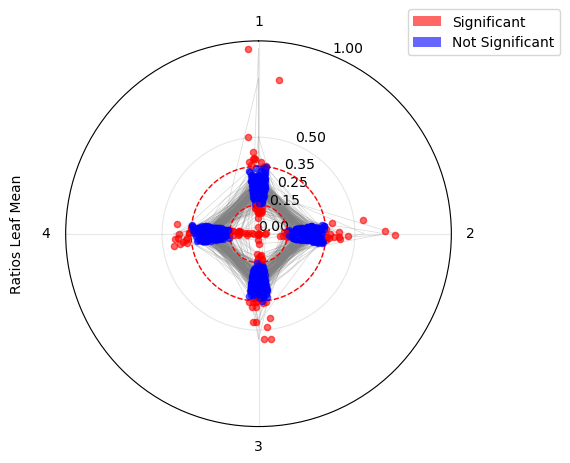

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Your existing code
cis_results_control['significant'] = (cis_results_control['p_value'] < 0.05) & (cis_results_control['ratio_difference'] > 0.1)

# Create figure with polar projection
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='polar'))

# Map alleles to angles
alleles = ['1', '2', '3', '4']
angles = np.linspace(0, 2 * np.pi, len(alleles), endpoint=False)
allele_to_angle = dict(zip(alleles, angles))

# Add jitter to avoid overlapping points
np.random.seed(42)
jitter_amount = 0.15

# Plot points
for idx, row in cis_results_control.iterrows():
    angle = allele_to_angle[row['allele']] + np.random.uniform(-jitter_amount, jitter_amount)
    radius = row['ratios_leaf_mean']
    color = 'red' if row['significant'] else 'blue'
    ax.scatter(angle, radius, c=color, s=20, alpha=0.6, zorder=3)

# Connect paired points by Synt_id
for synt_id in cis_results_control['Synt_id'].unique():
    subset = cis_results_control[cis_results_control['Synt_id'] == synt_id]
    if len(subset) >= 2:
        subset_sorted = subset.sort_values('allele')
        angles_plot = [allele_to_angle[a] for a in subset_sorted['allele']]
        radii_plot = subset_sorted['ratios_leaf_mean'].values
        
        # If we have all 4 alleles, close the loop by adding the first point at the end
        if len(subset_sorted) == 4:
            angles_plot.append(angles_plot[0])
            radii_plot = np.append(radii_plot, radii_plot[0])
        
        # Connect points
        ax.plot(angles_plot, radii_plot, color='gray', linewidth=0.5, alpha=0.3, zorder=1)

# Add reference circles
ax.plot(np.linspace(0, 2*np.pi, 100), [0.35]*100, 'r--', linewidth=1, zorder=2)
ax.plot(np.linspace(0, 2*np.pi, 100), [0.15]*100, 'r--', linewidth=1, zorder=2)

# Customize the plot
ax.set_theta_zero_location('N')  # 0 degrees at top
ax.set_theta_direction(-1)  # Clockwise
ax.set_ylim(0, 1.0)
ax.set_yticks([0.0, 0.15, 0.25, 0.35, 0.5, 1.0])
ax.set_xticks(angles)
ax.set_xticklabels(alleles)
ax.set_ylabel('Ratios Leaf Mean', labelpad=30)
ax.grid(True, alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.6, label='Significant'),
                   Patch(facecolor='blue', alpha=0.6, label='Not Significant')]
ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.show()

In [23]:
cis_results_control['allele'].unique()

array(['4', '1', '2', '3'], dtype=object)

In [24]:
print(cis_results_control[['Synt_id', 'allele', 'ratios_leaf_mean']].head(10))

           Synt_id allele  ratios_leaf_mean
138  Synt_id_19637      4          0.272633
713  Synt_id_53205      1          0.804918
637  Synt_id_44380      4          0.053016
470  Synt_id_35878      2          0.463390
754  Synt_id_56017      3          0.109318
581  Synt_id_40655      1          0.504506
752  Synt_id_56017      2          0.548479
712  Synt_id_53205      3          0.000000
715  Synt_id_53205      2          0.000000
738  Synt_id_55638      2          0.031865


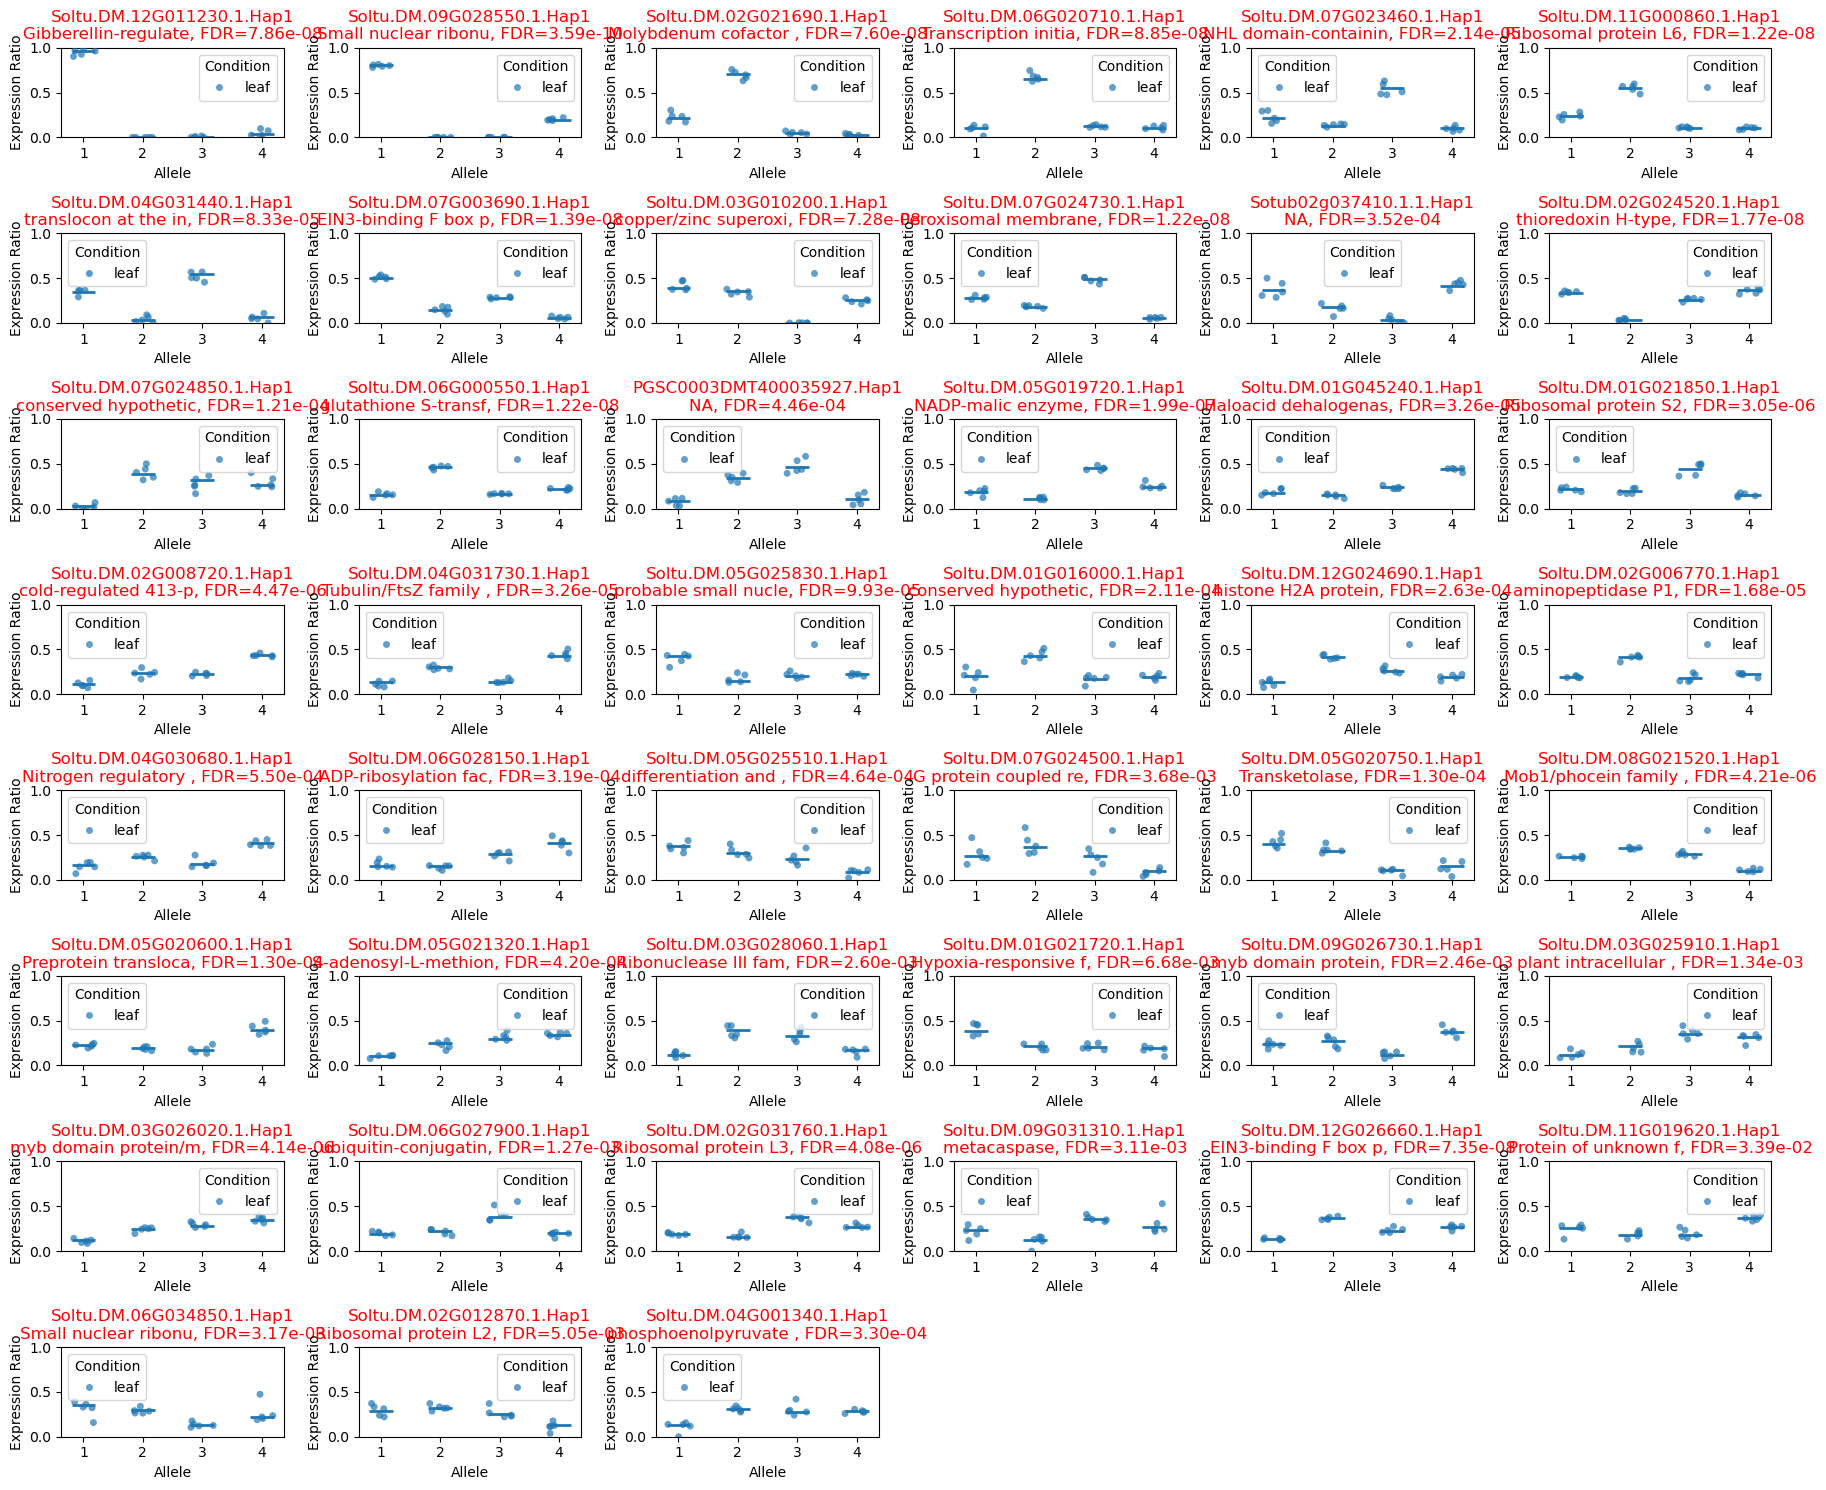

In [ ]:
# 3. Plot the results
fig = plot_top_differential_syntelogs(cis_top_results, n = 50, figsize = (3*6, 5*3),sort_by='ratio_difference')
#cis_results_control.to_csv('/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/ASE_results/long_cis_results_control.tsv', sep='\t')


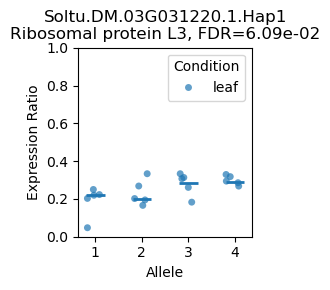

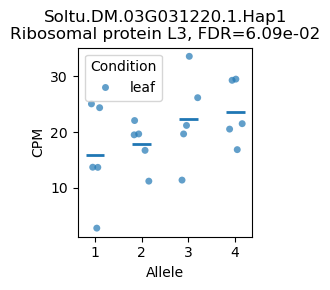

In [ ]:
Synt_id = "Soltu.DM.03G031220"
import matplotlib.pyplot as plt
# plot next to each other

# filter results for specific synt id
cis_results_filtered_synt = cis_results_control[cis_results_control['transcript_id'].str.contains(Synt_id)]
ax1 = plot_top_differential_syntelogs(cis_results_filtered_synt, n = 20, figsize = (12, 3),sort_by='ratio_difference')
ax1.savefig(f"/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/final_plots/ATL_cis_{Synt_id}_ratio.svg" )
# filter results for specific synt id
cis_results_filtered_synt = cis_results_control[cis_results_control['transcript_id'].str.contains(Synt_id)]
ax2 = plot_top_differential_syntelogs(cis_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', plot_type='cpm' )
ax2.savefig(f"/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/final_plots/ATL_cis_{Synt_id}_cpm.svg" )

In [ ]:
# # for transcript id split the hap and ./d.
# cis_results_control['transcript_id'] = cis_results_control['transcript_id'].apply(lambda x: x.rsplit('.', 2)[0] if isinstance(x, str) else x)
# cis_results_control.to_csv('/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/ASE_results/Atlantic_cis_results_control.tsv', sep='\t')

In [ ]:
# plot shared gene between atlantic and desiree
Synt_id = "Synt_id_14709"
import matplotlib.pyplot as plt
# plot next to each other

# filter results for specific synt id
cis_results_filtered_synt = cis_results_control[cis_results_control['Synt_id'] == Synt_id]
ax1 = plot_top_differential_syntelogs(cis_results_filtered_synt, n = 20, figsize = (3*6, 3*1),sort_by='ratio_difference', )

# filter results for specific synt id
cis_results_filtered_synt = cis_results_control[cis_results_control['Synt_id'] == Synt_id]
ax2 = plot_top_differential_syntelogs(cis_results_filtered_synt, n = 20, figsize = (3*6, 3*1),sort_by='ratio_difference', plot_type='cpm' )

No results to plot
No results to plot


In [ ]:
cis_top_results.sort_values(by='ratio_difference', ascending=False).head(10)

,Synt_id,allele,functional_annotation,transcript_id,p_value,ratio_difference,n_alleles,ratios_leaf_mean,ratios_rep_leaf,cpm_leaf_mean,cpm_rep_leaf,FDR
101,Synt_id_22638,3,copper/zinc superoxide dismutase,Soltu.DM.03G010200.1.Hap3,1.120853e-09,0.248870,4,0.001467,"[0.0, 0.0, 0.0034602076124567475, 0.002, 0.0]",0.093001,"[0.0, 0.0, 0.31173090141666077, 0.153276272664...",4.439579e-08
354,Synt_id_44380,3,Peroxisomal membrane 22 kDa (Mpv17/PMP22) fami...,Soltu.DM.07G024730.1.Hap3,1.286642e-09,0.234884,4,0.485177,"[0.4330935251798561, 0.46905537459283386, 0.48...",245.362751,"[228.96280609512684, 202.33983537406178, 235.6...",4.439579e-08
411,Synt_id_55638,2,thioredoxin H-type,Soltu.DM.02G024520.1.Hap2,2.092727e-10,0.218152,4,0.031865,"[0.04424778761061947, 0.05223880597014925, 0.0...",6.500582,"[7.606737744024146, 9.835964219572448, 4.98769...",1.106820e-08
257,Synt_id_35878,2,glutathione S-transferase phi,Soltu.DM.06G000550.1.Hap2,7.113937e-11,0.213626,4,0.463390,"[0.470679012345679, 0.4297994269340974, 0.4617...",224.919578,"[232.0055011927365, 210.77066184798105, 220.08...",8.580474e-09
222,Synt_id_34828,3,NADP-malic enzyme,Soltu.DM.05G019720.1.Hap3,4.952483e-09,0.206039,4,0.456265,"[0.4246913580246914, 0.43315508021390375, 0.44...",137.547875,"[130.83588919721532, 113.81615739790975, 125.3...",1.240727e-07
353,Synt_id_44380,4,Peroxisomal membrane 22 kDa (Mpv17/PMP22) fami...,Soltu.DM.07G024730.1.Hap4,6.288085e-11,0.197278,4,0.053016,"[0.0618705035971223, 0.06188925081433225, 0.06...",28.021179,"[32.70897229930383, 26.69761716741093, 29.9261...",8.580474e-09
7,Synt_id_12347,3,Ribosomal protein S21e,Soltu.DM.01G021850.1.Hap3,1.084015e-07,0.189839,4,0.440106,"[0.49209932279909707, 0.5, 0.4839188520534389,...",287.004637,"[331.6537656394528, 363.93067612418054, 304.87...",1.984582e-06
46,Synt_id_17607,4,cold-regulated 413-plasma membrane,Soltu.DM.02G008720.1.Hap4,1.958227e-07,0.182651,4,0.433212,"[0.4295774647887324, 0.42857142857142855, 0.45...",44.980814,"[46.4011002385473, 50.584958843515444, 51.7473...",2.824594e-06
185,Synt_id_29709,4,Tubulin/FtsZ family protein,Soltu.DM.04G031730.1.Hap4,1.699378e-06,0.177461,4,0.427974,"[0.5050505050505051, 0.45454545454545453, 0.43...",33.556234,"[38.033688720120736, 28.10275491306414, 31.484...",2.128694e-05
251,Synt_id_35702,1,probable small nuclear ribonucleoprotein G,Soltu.DM.05G025830.1.Hap1,7.296832e-06,0.177343,4,0.426869,"[0.37383177570093457, 0.3, 0.4329501915708812,...",35.043433,"[30.426950976096585, 21.077066184798102, 35.22...",6.679408e-05


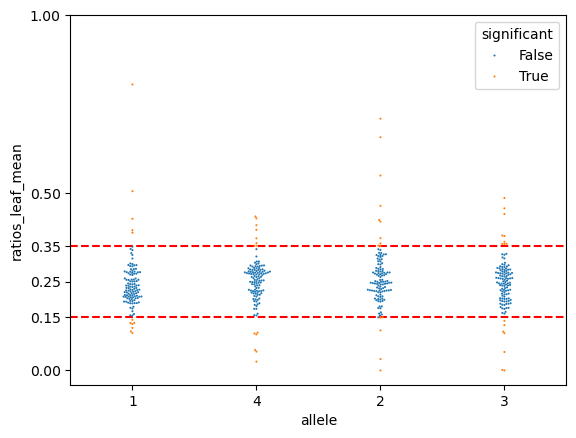

### And cis for heat

In [ ]:
# # select only the genes with equal lengths, low multimapping ratio and synteny category "1hap1_1hap2_1hap3_1hap4_s"
# mask = (allelic_data_filtered.var["multimapping_ratio"] < 0.25) & (allelic_data_filtered.var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s") & (allelic_data_filtered.var["CDS_haplotype_with_longest_annotation"] == "equal_lengths") & (allelic_data_filtered.var['Synt_id'].isin(synt_ids_same_tx_number.index))
# allelic_data_length_filter = allelic_data_filtered[:,mask].copy()

# # 1. Test for differential allelic ratios withing conditions
# cis_results_heat = test_allelic_ratios_within_conditions(allelic_data_length_filter, layer="unique_counts", test_condition= "heat", inplace=True)

# # Get the synt_ids with high bias and filter
# potential_high_bias_synt_ids = cis_results_heat.sort_values(by='ratio_difference', ascending=False)['Synt_id'].head(7)
# # exclude these from the cis_results
# cis_results_filtered = cis_results_heat[~cis_results_heat['Synt_id'].isin(potential_high_bias_synt_ids)].copy()

# # 2. Get top differential syntelogs
# cis_top_results = get_top_differential_syntelogs(cis_results_filtered, n=20, sort_by='ratio_difference', fdr_threshold=0.05, ratio_threshold=0.1)

# # 3. Plot the results
# fig = plot_top_differential_syntelogs(cis_top_results, n = 20, figsize = (3*6, 3*3),sort_by='ratio_difference')

### Plot CPMs

In [ ]:
grouped_results= cis_results_control.groupby('Synt_id').agg({
    'FDR': 'min',
    'ratio_difference': 'max' , # Assuming this is the correct column name
    'transcript_id': 'first'  # Concatenate transcript IDs
        })
# split the last prefix from transcript_id
grouped_results['gene_id'] = grouped_results['transcript_id'].apply(lambda x: x.rsplit('.', 1)[0] if isinstance(x, str) else x)
    # Print summary
significant_results = grouped_results[(grouped_results['FDR'] < 0.05) & (grouped_results['ratio_difference'] > 0.1)]

unsignificant_results = grouped_results[(grouped_results['FDR'] >= 0.05) | (grouped_results['ratio_difference'] <= 0.1)]

# save only the gene_Id column to a tsv
#significant_results[['gene_id']].to_csv('unbalanced_syntelogs.tsv', sep='\t', index=False)

#grouped_results[['gene_id']].to_csv('all_syntelogs.tsv', sep='\t', index=False)

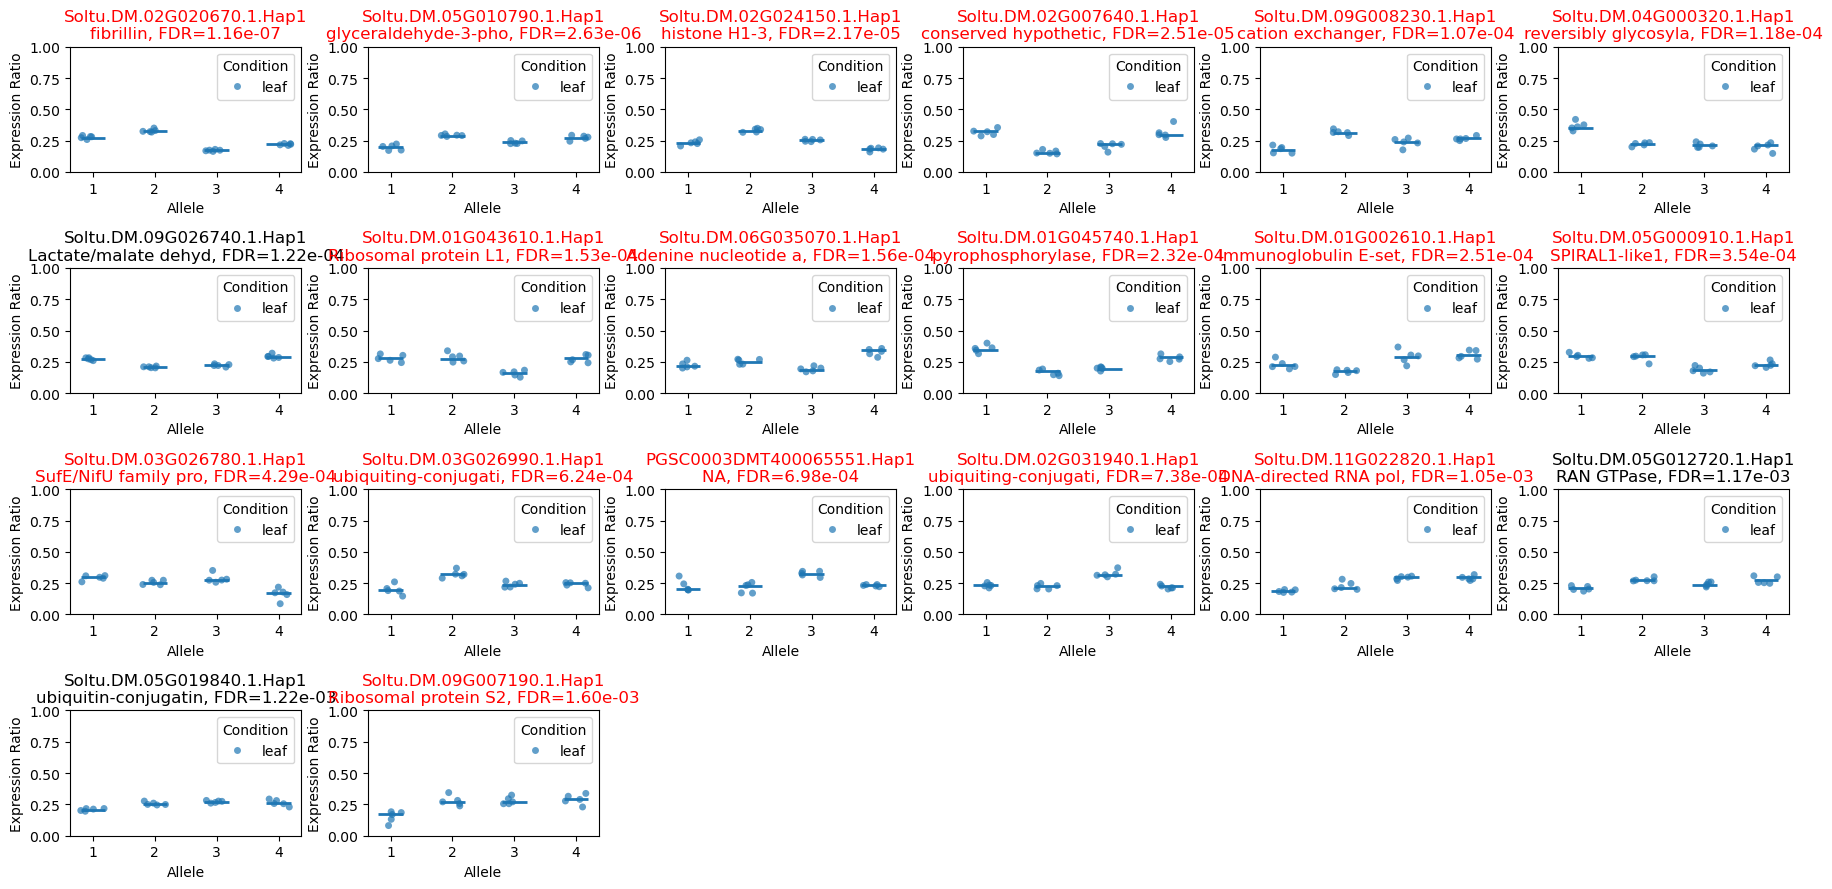

In [ ]:
# Filter the syntelog results with balanced expression for plotting
mask = unsignificant_results.index
balanced_cis_results = cis_results_control[cis_results_control['Synt_id'].isin(unsignificant_results.index)]
fig = plot_top_differential_syntelogs(balanced_cis_results, n = 20, figsize = (3*6, 3*3), )

In [ ]:
#cis_results_control.to_csv("/scratch/nadjafn/for_yuchao/Desiree_results/desiree_allelic_ratios_results_cpm.tsv", sep="\t")

Running Mercator did not lead to any overrepresentation https://www.plabipd.de/mercator_main.html

### Between conditions


In [ ]:
# Filter to only include synteny category "1hap1_1hap2_1hap3_1hap4_s" 

mask = (allelic_data_filtered.var["synteny_category"] == "1hap1_1hap2_1hap3_1hap4_s")
allelic_data_syntelogs = allelic_data_filtered[:,mask].copy()

Using CPM data from layer: unique_cpm
Processing syntelog 100/345
Processing syntelog 200/345
Processing syntelog 300/345
Found 186 from 342 syntelogs with at least one significantly different allelic ratio (FDR < 0.05)


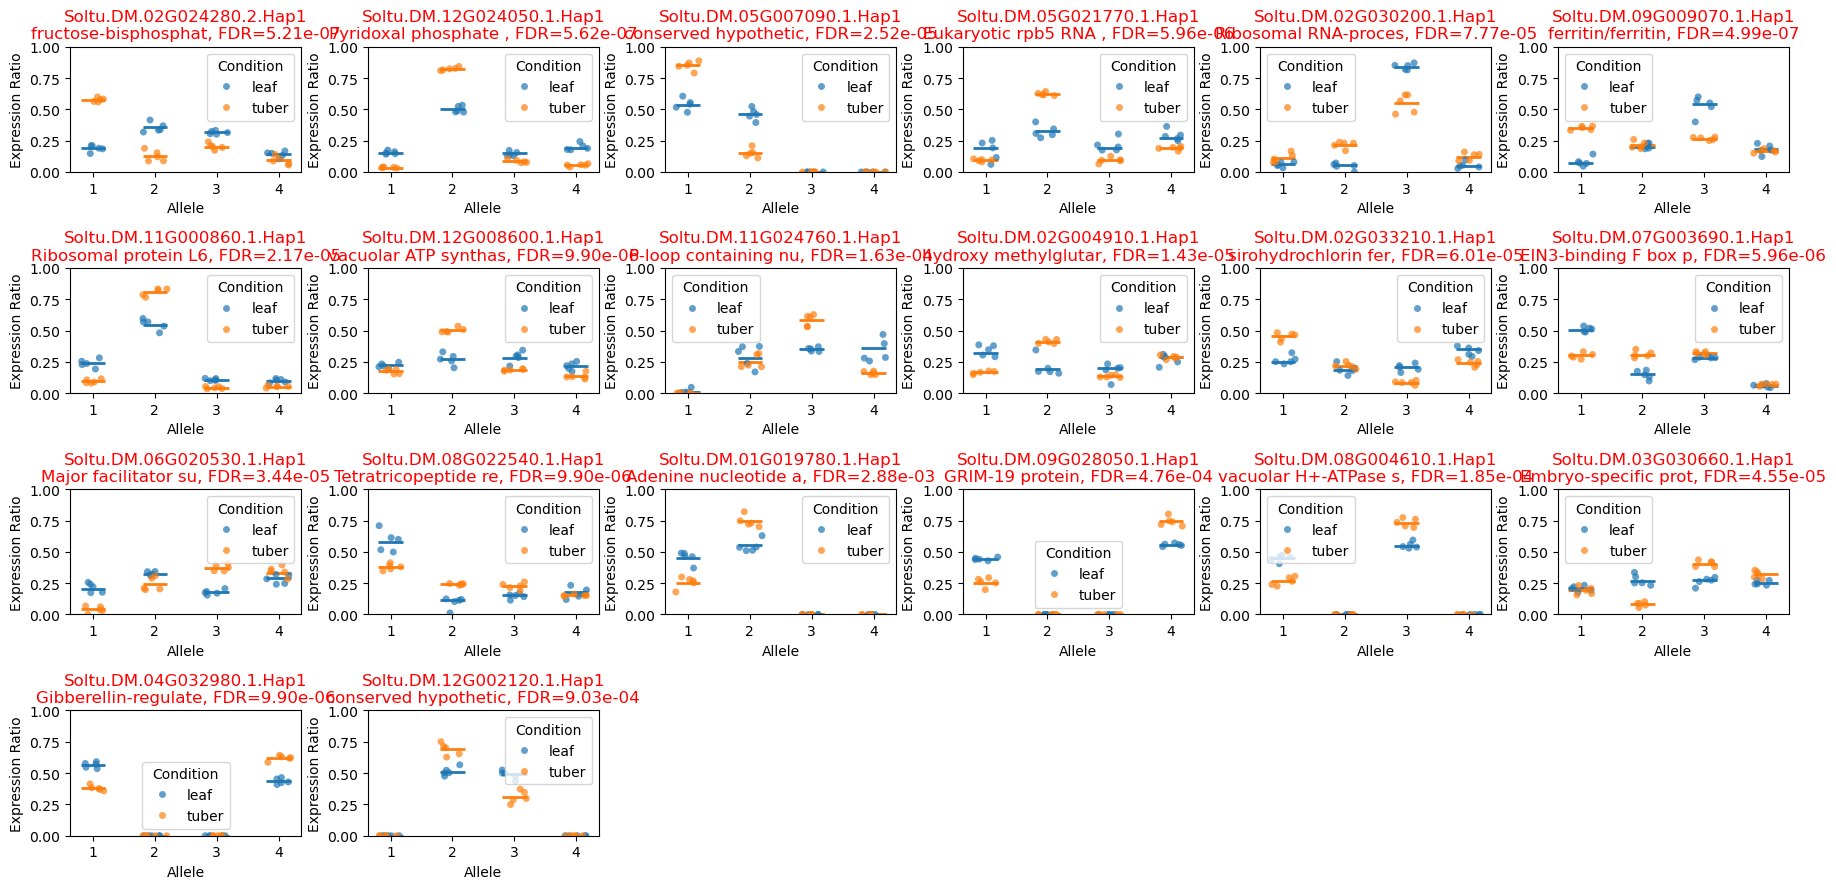

In [ ]:
# 1. Run allelic ratio test
results_df_trans = test_allelic_ratios_between_conditions(allelic_data_syntelogs)

# 2. Get top differential syntelogs
top_results_trans = get_top_differential_syntelogs(results_df_trans, n=50, sort_by='ratio_difference', fdr_threshold=0.05)

# 3. Plot the results
#fig = plot_top_differential_syntelogs(top_results_trans,n = 46, figsize=(3*6, 4*3), sort_by='FDR')
#plt.show()
fig = plot_top_differential_syntelogs(top_results_trans, figsize=(6*3, 3*3), n = 20, difference_threshold=0.1, sort_by='ratio_difference', sig_threshold=0.05)


#### Plot Ribosomal protein L3

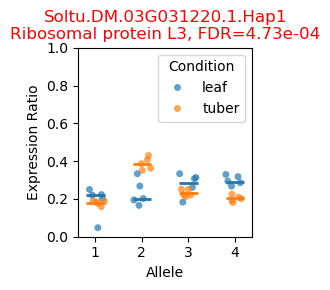

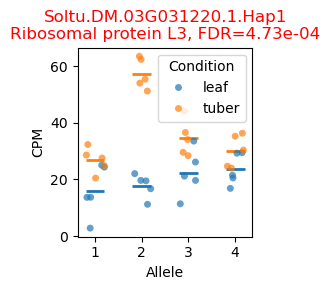

In [ ]:
gene_id = "Soltu.DM.03G031220"
import matplotlib.pyplot as plt
# plot next to each other

# filter results for specific synt id
trans_results_filtered_synt = results_df_trans[results_df_trans['gene_id'].str.contains(gene_id)]
ax1 = plot_top_differential_syntelogs(trans_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', )

# filter results for specific synt id
trans_results_filtered_synt = results_df_trans[results_df_trans['gene_id'].str.contains(gene_id)]
ax2 = plot_top_differential_syntelogs(trans_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', plot_type='cpm' )
ax2.savefig(f"/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/final_plots/ATL_trans_{gene_id}_cpm.svg" )

##### Plot vacuolar ATP synthase subunit A

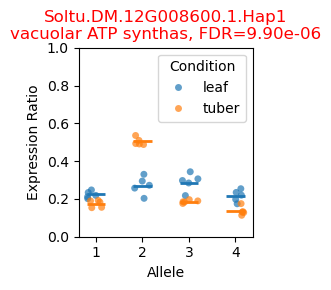

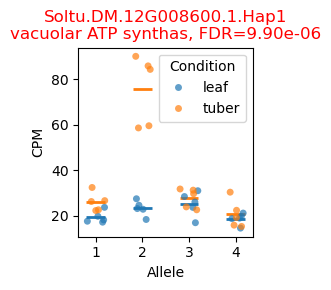

In [ ]:
gene_id = "Soltu.DM.12G008600"
import matplotlib.pyplot as plt
# plot next to each other

# filter results for specific synt id
trans_results_filtered_synt = results_df_trans[results_df_trans['gene_id'].str.contains(gene_id)]
ax1 = plot_top_differential_syntelogs(trans_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', )

# filter results for specific synt id
trans_results_filtered_synt = results_df_trans[results_df_trans['gene_id'].str.contains(gene_id)]
ax2 = plot_top_differential_syntelogs(trans_results_filtered_synt, n = 20, figsize = (12, 3*1),sort_by='ratio_difference', plot_type='cpm' )
ax2.savefig(f"/scratch/nadjafn/LR_DESIREE_PAPER/ANALYSIS/final_plots/ATL_trans_{gene_id}_cpm.svg" )

In [ ]:
top_results_trans['Unitato_gene_id'] = top_results_trans['gene_id'].apply(lambda x: x.rsplit('.', 1)[0] if isinstance(x, str) else x)
# group by Synt_id and get the min FDR and max ratio_difference
top_results_trans_grouped = top_results_trans.groupby('Synt_id').agg({
    'FDR': 'min',
    'ratio_difference': list , # Assuming this is the correct
    'allele' : list,
    'gene_id': list,
    'Unitato_gene_id': 'first'  # Get unique gene IDs

})
# save the results to a tsv
# top_results_trans_grouped.to_csv('/scratch/nadjafn/LR_DESIREE_PAPER/AI_results/top_results_trans.tsv', sep='\t')


/tmp/ipykernel_2313172/2973864598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_results_trans['Unitato_gene_id'] = top_results_trans['gene_id'].apply(lambda x: x.rsplit('.', 1)[0] if isinstance(x, str) else x)


## Isoform level analysis

In [25]:

# only keep the isoforms that have enghough gene-level read counts
allelic_data_filtered_isoform = allelic_data[:, allelic_data.var["gene_id"].isin(adata_gene_filtered.var["gene_id"])].copy()
# filter isoforms that have less 

In [26]:
allelic_data_filtered_isoform = calculate_allelic_ratios(allelic_data_filtered_isoform  , 'unique_counts' )
allelic_data_filtered_isoform = calculate_multi_ratios(allelic_data_filtered_isoform , 'unique_counts', 'ambiguous_counts')
allelic_data_filtered_isoform = calculate_per_allele_ratios(allelic_data_filtered_isoform, unique_layer='unique_counts', multi_layer='ambiguous_counts')

In [33]:
# select only the genes with equal lengths, low multimapping ratio and synteny category "1hap1_1hap2_1hap3_1hap4_s"
mask =  (allelic_data_filtered_isoform .var["multimapping_ratio_per_allele_weighted_average"] < 0.3) &  (allelic_data_filtered_isoform .var["transcript_multimapping_ratio"] < 0.3)
allelic_data_length_filter_isoform = allelic_data_filtered_isoform[:,mask].copy()

# 1. Test for differential allelic ratios withing conditions
DIU_results, DIU_plotting_result = test_isoform_DIU_between_conditions(allelic_data_length_filter_isoform, layer="unique_counts", inplace=True)



Calculating isoform ratios...
Processing gene 100/2256
Processing gene 200/2256
Processing gene 300/2256
Processing gene 400/2256
Processing gene 500/2256
Processing gene 600/2256
Processing gene 700/2256
Processing gene 800/2256
Processing gene 900/2256
Processing gene 1000/2256
Processing gene 1100/2256
Processing gene 1200/2256
Processing gene 1300/2256
Processing gene 1400/2256
Processing gene 1500/2256
Processing gene 1600/2256
Processing gene 1700/2256
Processing gene 1800/2256
Processing gene 1900/2256
Processing gene 2000/2256
Processing gene 2100/2256
Processing gene 2200/2256
Found 8 from 51 genes with at least one significantly different isoform usage (FDR < 0.05)
Skipped 45 isoforms due to zero counts
Created plotting table with 710 rows (one per replicate, condition, isoform ratio, and transcript)


In [35]:
ensembl_gtf_path = "/scratch/nadjafn/reference/Atlantic/unitato2Atl.with_chloroplast_and_mito.no_scaffold.agat.gtf"
annotation = RNApy.read_ensembl_gtf(ensembl_gtf_path)

# add the bambu annotations to the annotation dataframe
# with bambu
bambu = "/scratch/nadjafn/nf-core-plantlongrnaseq/output_atlantic_liftoff/gff/combined.fixed.gtf"
bambu_annotation = RNApy.read_ensembl_gtf(bambu)
bambu_annotation = bambu_annotation.filter(pl.col("transcript_id").str.contains("Bambu"))


annotation.extend(bambu_annotation)
annotation_df = annotation.to_pandas()
annotation_df['gene_id_unitato'] = annotation_df['gene_id'].str.rsplit('.', n=1).str[0]

annotation_function = pd.merge(annotation_df,df_annotation, how="left", on="gene_id_unitato")
# set Nan functional annotation to "No_annotation"
annotation_function['functional_annotation'] = annotation_function['functional_annotation'].fillna("No_annotation")
#annotation_function['gene_id'] = annotation_function['functional_annotation']
# back to polar
annotation_function = pl.from_pandas(annotation_function)

In [36]:
figures = plot_differential_isoform_usage(
    results_df=DIU_plotting_result,
    annotation_df=annotation_function,
    fdr_threshold=0.05,
    ratio_difference_threshold=0.3
)

Detected layer: unique_counts (using column: unique_counts_cpm)
Found 8 genes with significant isoforms. Plotting all isoforms for these genes.
Processing gene: Soltu.DM.02G014130.Hap4


Processing gene: Soltu.DM.07G022010.Hap1
Skipping Soltu.DM.07G022010.Hap1 as it has only one transcript
Processing gene: Soltu.DM.07G022010.Hap3
Skipping Soltu.DM.07G022010.Hap3 as it has only one transcript
Processing gene: Soltu.DM.07G026360.Hap0


Processing gene: Soltu.DM.10G027570.Hap0


Processing gene: Soltu.DM.10G027570.Hap2


Processing gene: Soltu.DM.11G022220.Hap1


/users/nadjafn/.conda/envs/polyase/lib/python3.12/site-packages/RNApysoforms/gene_filtering.py:168: UserWarning:

1 transcript(s) are present in the annotation but missing in the expression matrix. Missing transcripts: Soltu.DM.11G022220.3.Hap1. Only transcripts present in both will be returned.



Processing gene: Soltu.DM.11G023050.Hap1


/users/nadjafn/.conda/envs/polyase/lib/python3.12/site-packages/RNApysoforms/gene_filtering.py:168: UserWarning:

1 transcript(s) are present in the annotation but missing in the expression matrix. Missing transcripts: Soltu.DM.11G023050.1.Hap1. Only transcripts present in both will be returned.



Generated 6 plots for differential isoform usage


##### By structutre

In [40]:
# Step 1: First add exon structure information to your AnnData object
gtf_file = "/scratch/nadjafn/nf-core-plantlongrnaseq/output_atlantic_liftoff/gff/combined.fixed.gtf"

# Add structure information (this only needs to be done once)
add_structure_from_gtf(allelic_data_filtered_isoform , gtf_file, inplace=True, verbose=True)


Loading GTF file: /scratch/nadjafn/nf-core-plantlongrnaseq/output_atlantic_liftoff/gff/combined.fixed.gtf
Processing exon structures...
Processed 250224 transcripts
Exon count distribution:
n_exons
1     70765
2     53581
3     32202
4     19639
5     14515
6     11146
7      9139
8      7440
9      6317
10     5105
Name: count, dtype: int64
Calculated introns for 179459 multi-exon transcripts
Intron count distribution:
n_introns
1     53581
2     32202
3     19639
4     14515
5     11146
6      9139
7      7440
8      6317
9      5105
10     3976
Name: count, dtype: int64
Adding structure information to AnnData.var...
Matched structure information for 4766/4766 transcripts
Successfully added exon structure information for 250224 transcripts
  - Intron structures calculated for multi-exon transcripts


In [55]:
mask = (
    (allelic_data_filtered_isoform.var["multimapping_ratio"] < 0.5) & 
    (allelic_data_filtered_isoform.var["multimapping_ratio_per_allele_weighted_average"] < 0.5) &
    (allelic_data_filtered_isoform.var["synteny_category"].str.contains(
        "1hap1_1hap2_1hap3_1hap4_s",
        na=False
    ))
)

allelic_data_test = allelic_data_filtered_isoform[:,mask].copy()


# Step 2: Run structure-based DIU analysis
print("Running structure-based differential isoform usage analysis...")

Synt_id = 'Synt_id_35710'
mask = allelic_data_test.var["Synt_id"] == Synt_id
allelic_data_test_synt = allelic_data_test[:,mask].copy()
results_DIU_allele, results_DIU_plotting = test_differential_isoform_structure(
    allelic_data_test, 
    layer="unique_counts",
    test_condition="all",  # or "all" to use all conditions
    min_similarity_for_matching=0.60,
    inplace=True

)


Running structure-based differential isoform usage analysis...
DEBUG: Found 10 samples for condition 'all'
DEBUG: Found 224 syntelogs to process

DEBUG Syntelog Synt_id_46669: 2 haplotypes, 2 transcripts
DEBUG: Haplotype expressions: {'hap1': np.int64(1262), 'hap4': np.int64(915)}
DEBUG: Selected reference haplotype: hap1 (expression=1262)
DEBUG: Reference haplotype hap1 has 1 isoforms
  Soltu.DM.08G014110.1.Hap1: expression=1262
  hap4: No suitable matches found
DEBUG: Found 1 haplotype matches

DEBUG Syntelog Synt_id_26903: 4 haplotypes, 4 transcripts
DEBUG: Haplotype expressions: {'hap2': np.int64(648), 'hap3': np.int64(401), 'hap1': np.int64(308), 'hap4': np.int64(633)}
DEBUG: Selected reference haplotype: hap2 (expression=648)
DEBUG: Reference haplotype hap2 has 1 isoforms
  Soltu.DM.04G002590.1.Hap2: expression=648
  hap3: Matched to MAJOR (Soltu.DM.04G002590.1.Hap3, sim=0.998)
  hap1: Matched to MAJOR (Soltu.DM.04G002590.1.Hap1, sim=1.000)
  hap4: Matched to MAJOR (Soltu.DM.04G0

In [56]:
results_DIU_allele

,Synt_id,reference_haplotype,comparison_haplotype,reference_transcript,comparison_transcript,isoform_type_tested,p_value,ratio_difference,reference_ratio_mean,comparison_ratio_mean,FDR
16,Synt_id_23080,hap1,hap3,Soltu.DM.03G011750.2.Hap1,Soltu.DM.03G011750.2.Hap3,major,0.000000e+00,0.018618,0.994265,0.975647,0.000000e+00
362,Synt_id_38611,hap4,hap1,Soltu.DM.06G021330.2.Hap4,Soltu.DM.06G021330.2.Hap1,major,5.010994e-12,0.210968,0.657742,0.868710,1.403078e-09
106,Synt_id_59067,hap3,hap1,BambuTx4008_2,BambuTx3983,major,1.540825e-11,0.492041,0.997589,0.505548,2.876206e-09
363,Synt_id_38611,hap4,hap2,Soltu.DM.06G021330.2.Hap4,Soltu.DM.06G021330.2.Hap2,major,3.532905e-07,0.103395,0.657742,0.554347,4.946067e-05
319,Synt_id_49718,hap3,hap2,Soltu.DM.09G009070.2.Hap3,Soltu.DM.09G009070.2.Hap2,major,6.288419e-07,0.041273,1.000000,0.958727,7.043029e-05
...,...,...,...,...,...,...,...,...,...,...,...
21,Synt_id_22638,hap1,hap2,Soltu.DM.03G010200.1.Hap1,Soltu.DM.03G010200.1.Hap2,major,1.000000e+00,0.000000,1.000000,1.000000,1.000000e+00
20,Synt_id_22638,hap1,hap4,Soltu.DM.03G010200.1.Hap1,Soltu.DM.03G010200.1.Hap4,major,1.000000e+00,0.000000,1.000000,1.000000,1.000000e+00
19,Synt_id_35702,hap1,hap3,Soltu.DM.05G025830.1.Hap1,Soltu.DM.05G025830.1.Hap3,major,1.000000e+00,0.000000,1.000000,1.000000,1.000000e+00
18,Synt_id_35702,hap1,hap2,Soltu.DM.05G025830.1.Hap1,Soltu.DM.05G025830.1.Hap2,major,1.000000e+00,0.000000,1.000000,1.000000,1.000000e+00


In [57]:
fig = plot_allele_specific_isoform_structure(results_DIU_plotting , annotation_df=annotation_function,ratio_difference_threshold=0.2)

Detected layer: isoform (using column: isoform_cpm)
Found 3 syntelogs with significant allelic differences. Plotting all isoforms for these syntelogs.
Processing Synt_id: Synt_id_35710
Gene: Soltu.DM.05G025890.Hap3


Processing Synt_id: Synt_id_59067
Gene: Soltu.DM.11G023050.Hap3


Processing Synt_id: Synt_id_38611
Gene: Soltu.DM.06G021330.Hap4


Generated 3 plots for allele-specific isoform structure


In [39]:
results_DIU_plotting[results_DIU_plotting['haplotype']=='hap2']

,Synt_id,gene_id,haplotype,sample,condition,isoform_rank,isoform_id,transcript_id,isoform_ratio,isoform_counts,...,isoform_cpm,unique_counts_cpm,unique_counts_total_counts,similarity_to_reference,reference_haplotype,is_reference_haplotype,has_expression,p_value,FDR,ratio_difference
60,Synt_id_39395,Soltu.DM.06G027840.Hap2,hap2,SRR14993892,leaf,major,Soltu.DM.06G027840.1.Hap2,Soltu.DM.06G027840.1.Hap2,1.0,36,...,316.572574,316.572574,36,1.0,hap2,True,True,1.0,1.0,0.0
61,Synt_id_39395,Soltu.DM.06G027840.Hap2,hap2,SRR14993893,leaf,major,Soltu.DM.06G027840.1.Hap2,Soltu.DM.06G027840.1.Hap2,1.0,29,...,470.244852,470.244852,29,1.0,hap2,True,True,1.0,1.0,0.0
62,Synt_id_39395,Soltu.DM.06G027840.Hap2,hap2,SRR14993895,leaf,major,Soltu.DM.06G027840.1.Hap2,Soltu.DM.06G027840.1.Hap2,1.0,107,...,378.566753,378.566753,107,1.0,hap2,True,True,1.0,1.0,0.0
63,Synt_id_39395,Soltu.DM.06G027840.Hap2,hap2,SRR14993894,leaf,major,Soltu.DM.06G027840.1.Hap2,Soltu.DM.06G027840.1.Hap2,1.0,296,...,526.855385,526.855385,296,1.0,hap2,True,True,1.0,1.0,0.0
64,Synt_id_39395,Soltu.DM.06G027840.Hap2,hap2,SRR14996168,leaf,major,Soltu.DM.06G027840.1.Hap2,Soltu.DM.06G027840.1.Hap2,1.0,172,...,393.992981,393.992981,172,1.0,hap2,True,True,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14935,Synt_id_39550,Soltu.DM.06G028660.Hap4,hap2,SRR14995033,tuber,major,Soltu.DM.06G028660.1.Hap4,Soltu.DM.06G028660.1.Hap2,1.0,253,...,1008.072549,1008.072549,253,1.0,hap4,False,True,1.0,1.0,0.0
14936,Synt_id_39550,Soltu.DM.06G028660.Hap4,hap2,SRR14995031,tuber,major,Soltu.DM.06G028660.1.Hap4,Soltu.DM.06G028660.1.Hap2,1.0,218,...,897.958175,897.958175,218,1.0,hap4,False,True,1.0,1.0,0.0
14937,Synt_id_39550,Soltu.DM.06G028660.Hap4,hap2,SRR14995032,tuber,major,Soltu.DM.06G028660.1.Hap4,Soltu.DM.06G028660.1.Hap2,1.0,186,...,1028.800894,1028.800894,186,1.0,hap4,False,True,1.0,1.0,0.0
14938,Synt_id_39550,Soltu.DM.06G028660.Hap4,hap2,SRR14995034,tuber,major,Soltu.DM.06G028660.1.Hap4,Soltu.DM.06G028660.1.Hap2,1.0,128,...,925.644697,925.644697,128,1.0,hap4,False,True,1.0,1.0,0.0


In [40]:
results_DIU_plotting

,Synt_id,gene_id,haplotype,sample,condition,isoform_rank,isoform_id,transcript_id,isoform_ratio,isoform_counts,...,isoform_cpm,unique_counts_cpm,unique_counts_total_counts,similarity_to_reference,reference_haplotype,is_reference_haplotype,has_expression,p_value,FDR,ratio_difference
0,Synt_id_27557,Soltu.DM.04G007580.Hap3,hap3,SRR14993892,leaf,major,BambuTx1528,BambuTx1528,1.000000,51,...,448.477814,448.477814,51,1.0,hap3,True,True,0.867501,1.0,0.000401
1,Synt_id_27557,Soltu.DM.04G007580.Hap3,hap3,SRR14993893,leaf,major,BambuTx1528,BambuTx1528,1.000000,27,...,437.814172,437.814172,27,1.0,hap3,True,True,0.867501,1.0,0.000401
2,Synt_id_27557,Soltu.DM.04G007580.Hap3,hap3,SRR14993895,leaf,major,BambuTx1528,BambuTx1528,0.992063,125,...,442.250880,442.250880,126,1.0,hap3,True,True,0.867501,1.0,0.000401
3,Synt_id_27557,Soltu.DM.04G007580.Hap3,hap3,SRR14993894,leaf,major,BambuTx1528,BambuTx1528,1.000000,211,...,375.562454,375.562454,211,1.0,hap3,True,True,0.867501,1.0,0.000401
4,Synt_id_27557,Soltu.DM.04G007580.Hap3,hap3,SRR14996168,leaf,major,BambuTx1528,BambuTx1528,1.000000,206,...,471.875315,471.875315,206,1.0,hap3,True,True,0.867501,1.0,0.000401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14955,Synt_id_15107,Soltu.DM.01G046760.Hap3,hap4,SRR14995033,tuber,major,Soltu.DM.01G046760.1.Hap3,Soltu.DM.01G046760.1.Hap4,1.000000,163,...,649.469666,649.469666,163,1.0,hap3,False,True,1.000000,1.0,0.000000
14956,Synt_id_15107,Soltu.DM.01G046760.Hap3,hap4,SRR14995031,tuber,major,Soltu.DM.01G046760.1.Hap3,Soltu.DM.01G046760.1.Hap4,1.000000,78,...,321.287787,321.287787,78,1.0,hap3,False,True,1.000000,1.0,0.000000
14957,Synt_id_15107,Soltu.DM.01G046760.Hap3,hap4,SRR14995032,tuber,major,Soltu.DM.01G046760.1.Hap3,Soltu.DM.01G046760.1.Hap4,1.000000,85,...,470.150946,470.150946,85,1.0,hap3,False,True,1.000000,1.0,0.000000
14958,Synt_id_15107,Soltu.DM.01G046760.Hap3,hap4,SRR14995034,tuber,major,Soltu.DM.01G046760.1.Hap3,Soltu.DM.01G046760.1.Hap4,1.000000,102,...,737.623118,737.623118,102,1.0,hap3,False,True,1.000000,1.0,0.000000


In [41]:
results_DIU_allele #[results_DIU_allele['haplotype']=='hap1']

,Synt_id,reference_haplotype,comparison_haplotype,reference_transcript,comparison_transcript,isoform_type_tested,p_value,ratio_difference,reference_ratio_mean,comparison_ratio_mean,FDR
376,Synt_id_23080,hap3,hap1,Soltu.DM.03G011750.2.Hap3,Soltu.DM.03G011750.2.Hap1,major,0.000000e+00,0.018618,0.975647,0.994265,0.000000e+00
11,Synt_id_40690,hap1,hap2,BambuTx2461,Soltu.DM.07G003860.1.Hap2,major,0.000000e+00,0.068853,0.931147,1.000000,0.000000e+00
327,Synt_id_38611,hap1,hap2,Soltu.DM.06G021330.2.Hap1,Soltu.DM.06G021330.2.Hap2,major,1.963145e-13,0.314363,0.868710,0.554347,5.464087e-11
328,Synt_id_38611,hap1,hap4,Soltu.DM.06G021330.2.Hap1,Soltu.DM.06G021330.2.Hap4,major,5.010994e-12,0.210968,0.868710,0.657742,1.046045e-09
640,Synt_id_18393,hap2,hap4,Soltu.DM.02G014130.1.Hap2,Soltu.DM.02G014130.1.Hap4,major,2.974917e-10,0.332686,1.000000,0.667314,4.968111e-08
...,...,...,...,...,...,...,...,...,...,...,...
21,Synt_id_16433,hap4,hap3,BambuTx595_1,BambuTx595_3,major,1.000000e+00,0.000000,1.000000,1.000000,1.000000e+00
20,Synt_id_47803,hap2,hap4,PGSC0003DMT400006164.Hap2,BambuTx3129,major,1.000000e+00,0.000000,1.000000,1.000000,1.000000e+00
19,Synt_id_47803,hap2,hap3,PGSC0003DMT400006164.Hap2,PGSC0003DMT400006164.Hap3,major,1.000000e+00,0.000000,1.000000,1.000000,1.000000e+00
18,Synt_id_47803,hap2,hap1,PGSC0003DMT400006164.Hap2,PGSC0003DMT400006164.Hap1,major,1.000000e+00,0.000000,1.000000,1.000000,1.000000e+00


In [43]:
# print resutls from Synt_id_36303
Synt_id = 'Synt_id_59067'
results_DIU_allele[results_DIU_allele['Synt_id'] == Synt_id]


,Synt_id,reference_haplotype,comparison_haplotype,reference_transcript,comparison_transcript,isoform_type_tested,p_value,ratio_difference,reference_ratio_mean,comparison_ratio_mean,FDR
334,Synt_id_59067,hap2,hap4,BambuTx3983_2,BambuTx3983_4,major,6.845078e-10,0.829660,0.853758,0.024098,9.526066e-08
332,Synt_id_59067,hap2,hap3,BambuTx3983_2,Soltu.DM.11G023050.1.Hap3,major,8.830094e-05,0.851346,0.853758,0.002411,4.915419e-03
333,Synt_id_59067,hap2,hap1,BambuTx3983_2,BambuTx3983,major,2.881598e-03,0.348210,0.853758,0.505548,1.203067e-01


In [44]:
allelic_data_filtered_isoform.var[allelic_data_filtered_isoform.var['gene_id'].str.contains("Soltu.DM.02G020360")]

,transcript_id,gene_id,feature_type,Synt_id,synteny_category,syntenic_genes,haplotype,CDS_length_category,CDS_haplotype_with_longest_annotation,gene_id_unitato,...,transcript_multimapping_ratio,exon_structure,transcript_length,n_exons,intron_structure,total_intron_length,n_introns,chromosome,strand,gene_id_gtf
original_index,,,,,,,,,,,,,,,,,,,,,
Soltu.DM.02G020360.1.Hap2,Soltu.DM.02G020360.1.Hap2,Soltu.DM.02G020360.Hap2,transcript,Synt_id_4088,2hap1_3hap2_2hap3_1hap4_no_s,"Soltu.DM.02G020360.1.Hap1,Soltu.DM.03G002660.1...",hap2,NaN,NaN,Soltu.DM.02G020360,...,0.009276,"245,100,103,77,72,87,571",1255.0,7,"271,1568,280,1069,89,118",3395.0,6,chr02_2,+,Soltu.DM.02G020360.Hap2
Soltu.DM.02G020360.1.Hap3,Soltu.DM.02G020360.1.Hap3,Soltu.DM.02G020360.Hap3,transcript,Synt_id_4088,2hap1_3hap2_2hap3_1hap4_no_s,"Soltu.DM.02G020360.1.Hap1,Soltu.DM.03G002660.1...",hap3,NaN,NaN,Soltu.DM.02G020360,...,0.015437,"246,100,103,77,72,87,570",1255.0,7,"270,2286,310,1049,89,118",4122.0,6,chr02_3,+,Soltu.DM.02G020360.Hap3
Soltu.DM.02G020360.1.Hap1,Soltu.DM.02G020360.1.Hap1,Soltu.DM.02G020360.Hap1,transcript,Synt_id_4088,2hap1_3hap2_2hap3_1hap4_no_s,"Soltu.DM.02G020360.1.Hap1,Soltu.DM.03G002660.1...",hap1,NaN,NaN,Soltu.DM.02G020360,...,0.004831,"246,100,103,77,72,87,536",1221.0,7,"268,1568,310,1049,89,118",3402.0,6,chr02_1,+,Soltu.DM.02G020360.Hap1
